In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import time
import timeit
%matplotlib inline
import numba as nb

figsizeConst = (11.6, 7.)
plt.rc('font', size=20)

In [2]:
class AbstractMainMethod:
     
        def __init__(self, f, u0, tStart, tEnd, xLeft, xRight, h, dt):
            
            
            
            self.f = f
            self.u0 = u0
            self.h = h
            self.dt = dt
            self.xLeft = xLeft
            self.xRight = xRight
            
            self.a = None
            self.b = None
        
            self.tnumBlocks =int((float(tEnd) - float(tStart))/self.dt)
            self.tnumPoints = self.tnumBlocks + 1
        
            self.xnumBlocks = int((float(xRight) - float(xLeft))/self.h)
            self.xnumPoints = self.xnumBlocks + 1
       
            self.solutionArray = np.zeros((self.tnumPoints, self.xnumPoints))
            self.timeArray = np.linspace(tStart, tEnd, self.tnumPoints)
            self.fieldArray = np.linspace(xLeft, xRight, self.xnumPoints)
        
            self.tStart, self.tEnd = float(tStart), float(tEnd)
            self.xLeft, self.xRight = float(xLeft), float(xRight)
        
        def solve(self):
            
            self.solutionArray[0] = self.u0(self.fieldArray)
        
            for i in range(self.tnumBlocks):
            
                uOld, dt, f = self.solutionArray[i], self.dt, self.f, 
                self.solutionArray[i + 1] = uOld + dt * np.dot(self.b, self.koeff(uOld))
                
                
        def koeff(self, ui):
            koeff = np.zeros((len(self.b), len(ui)))
            koeff[0] = self.f(ui)
            for i in range(len(koeff) - 1):
                koeff[i+1]  = self.f(ui + self.dt* np.dot(self.a[i+1, :], koeff))
            return koeff
        
        def PlotSolution(self):
        
            plt.plot(self.fieldArray, +
                 self.solutionArray[-1], '-')

In [3]:
class ExplicitEuler(AbstractMainMethod):
    
    def __init__(self, f, u0, tStart, tEnd, xLeft, xRight, h, dt):
        super().__init__( f, u0, tStart, tEnd, xLeft, xRight, h, dt)
        self.a = np.array([0])
        self.b = np.array([1])

In [4]:
class SolveViaHeun(ExplicitEuler):
    
      def __init__(self, f, u0, tStart, tEnd, xLeft, xRight, h, dt):
        super().__init__( f, u0, tStart, tEnd, xLeft, xRight, h, dt)
        a = np.array([[0, 0], [1,0]] )
        b = np. array([1/2, 1/2])
        

In [5]:
class SolveViaRK4(SolveViaHeun):
    
        def __init__(self, f, u0, tStart, tEnd, xLeft, xRight, h, dt):
            super().__init__( f, u0, tStart, tEnd, xLeft, xRight, h, dt)
            a = np.array([[0, 0, 0, 0], [1/2, 0, 0, 0], [0, 1/2, 0, 0], [0, 0, 1, 0]])
            b = np. array([1/6, 1/3, 1/3, 1/6])
       

In [6]:
class LogisticRightHandSide:

    def __init__(self, kappa, h, bl, br):
        self.kappa = float(kappa)
        self.h = float(h)
        self.bl = float(bl)
        self.br = float(br)

    def __call__(self, u):
        size = len(u)
        A = np.zeros((size, size))
        F = np.zeros(size)
        F[0], F[-1] = self.bl, self.br
        np.fill_diagonal(A, -2)
        np.fill_diagonal(A[1:], 1)
        np.fill_diagonal(A[:, 1:], 1)
        return (np.dot(A, u) + F) * self.kappa / self.h**2

In [7]:
methodsClass = [ExplicitEuler,SolveViaHeun, SolveViaRK4]

In [8]:
rhs1 = LogisticRightHandSide(kappa = 0.1, h = 0.04, bl =0. , br = 0 )
h = 0.04
kappa = 0.1
dt = h**2 / (kappa * 200.) 

def U0(vector):
    ans = []
    for arg in vector:
        if arg<0:
            raise NotImplementedError('Out of range')
        if arg>1:
            raise NotImplementedError('Out of range')
        if 0.4<=arg<=0.6:
            ans = ans + [1]
        else:
            ans = ans + [0]
    return ans

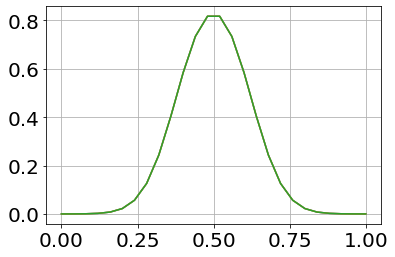

In [9]:
for methodClass in methodsClass:
    # вызываем конструктор
    method = methodClass(f=rhs1, u0=U0, tStart=0., tEnd=0.04, xLeft =0, xRight = 1, h = 0.04, dt = dt )

    
    method.solve()
    method.PlotSolution()


plt.grid('off')
plt.show() 